In [1]:
#!pip install --upgrade oct2py
import numpy as np
from oct2py import octave
import matplotlib.pyplot as plt
import os
from scipy.optimize import root
import pickle
import scipy.io
import numpy as np

In [2]:
# Set up Octave session
#oct = octave
# Add Dynare to Octave's path
octave.addpath('C:/dynare/6.1/matlab')  # Adjust this path as necessary


    _pyeval at line 57 column 30

    _pyeval at line 57 column 30



'.;C:\\Users\\blankenw\\AppData\\Local\\anaconda3\\Lib\\site-packages\\oct2py;C:\\Users\\blankenw\\AppData\\Local\\anaconda3\\Lib\\site-packages\\octave_kernel;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\9.1.0\\site\\oct\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\site\\oct\\api-v59\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\site\\oct\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\9.1.0\\site\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\api-v59\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m\\once_only;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m\\startup;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\9.1.0\\oct\\x86_64-w64-mingw32;C:\\Program Fi

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Substitution of exo leads: added 1 auxiliary variables and equations.
Found 3 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m00s.

STEADY-STATE RESULTS:

c               		 1.53061
k               

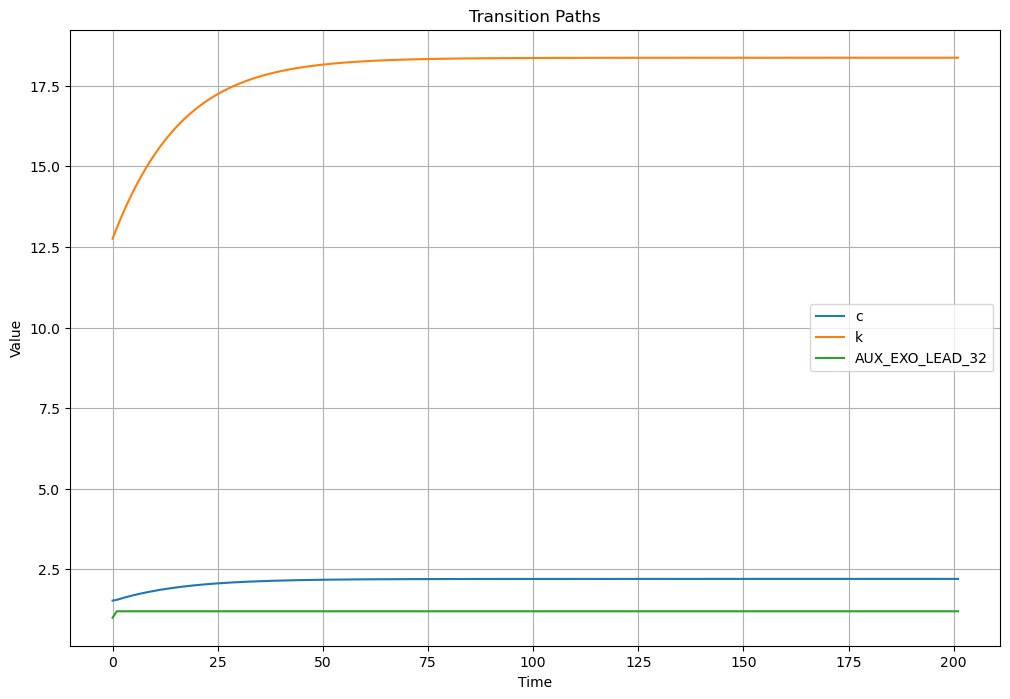

In [5]:
# Set up Octave session and run your model
octave.dynare('model_simple_example.mod')

# Pull necessary structures
oo_ = octave.pull('oo_')
M_ = octave.pull('M_')

# Get endogenous variable names
endo_names = [name[0] for name in M_['endo_names']]


endo_simul = oo_['endo_simul']
results = {name: endo_simul[i, :] for i, name in enumerate(endo_names)}

# Plot transition paths
plt.figure(figsize=(12, 8))
for name in results:
    plt.plot(results[name], label=name)
plt.legend()
plt.title('Transition Paths')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [7]:
M_

{'fname': 'model_simple_example',
 'dynare_version': '6.1',
 'dname': 'model_simple_example',
 'bvar': [],
 'params': array([[0.5 ],
        [0.5 ],
        [0.02],
        [0.05],
        [0.5 ]]),
 'endo_histval': [],
 'exo_histval': [],
 'exo_det_histval': [],
 'Correlation_matrix': 1.0,
 'Correlation_matrix_ME': 1.0,
 'parameter_used_with_lead_lag': 0,
 'xref1': {'param': Cell([], shape=(0, 0)),
  'endo': Cell([], shape=(0, 0)),
  'exo': Cell([], shape=(0, 0)),
  'exo_det': Cell([], shape=(0, 0))},
 'xref2': {'param': Cell([], shape=(0, 0)),
  'endo': Cell([], shape=(0, 0)),
  'exo': Cell([], shape=(0, 0)),
  'exo_det': Cell([], shape=(0, 0))},
 'osr': {'param_names': Cell([], shape=(0, 0)),
  'param_indices': [],
  'param_bounds': [],
  'variable_weights': [],
  'variable_indices': []},
 'instr_id': [],
 'exo_names': Cell([['x']]),
 'exo_names_tex': Cell([['x']]),
 'exo_names_long': Cell([['x']]),
 'endo_names': Cell([['c'],
        ['k'],
        ['AUX_EXO_LEAD_32']]),
 'endo_nam